1. Решить задачу Коши с правой частью, задаваемой функцией

function y = f2(t, u)

y = [-50*(u(1)-cos(t))+10*u(2); 1.2*u(1)-u(2)*u(1)];


In [212]:
import numpy as np
from numpy import cos, sin, pi
def f(u, t):
    #print('f1',(-50*(u[0]-cos(t)) +10*u[1]))
    #print('f2',(1.2*u[0]-u[1]*u[0]))
    return np.matrix([np.array([(-50*(u[0]-cos(t)) +10*u[1]).item(0)], dtype = np.float64), np.array([(1.2*u[0]-u[1]*u[0]).item(0)],dtype = np.float64)],dtype= np.float64)

def mult(vect, list_):
    res = np.matrix(np.zeros(vect[0].shape),dtype= np.float64)
    for v,l in zip(vect, list_):
        res+= v*l
    return res

def universal_runge_kutta(f ,u0, t, butcher, a, b):
    u = np.array([u0] * len(t))
    w = [np.matrix(np.zeros(u0.shape),dtype= np.float64)] * len(butcher)
    for i,ui in enumerate(u[:-1]):
        tau = t[i+1] - t[i]
        for j,wj in enumerate(w):
            w[j] = f(ui + tau * mult(w, butcher[j]),t[i] + tau * a[j])
        u[i+1] = ui + tau * mult(w,b)
    return u,t

In [213]:
butcher = np.array([ np.array([0, 0],dtype = np.float64), np.array([0.5, 0],dtype = np.float64) ])
a = np.array([0.0, 1/2],dtype = np.float64)
b = np.array([0.0, 1.0],dtype = np.float64)
u0 = np.matrix([[1.0], [1.0]],dtype = np.float64)

In [214]:
ans1 = universal_runge_kutta(f ,u0, np.linspace(0,0.75,8), butcher, a, b)

In [215]:
ans2 = universal_runge_kutta(f ,u0, np.linspace(0,0.75,int(128/0.75+1)), butcher, a, b)

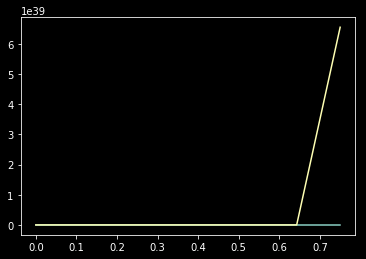

In [216]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.plot(ans1[1],[t[0] for t in ans1[0]])
plt.plot(ans1[1],[t[1] for t in ans1[0]])

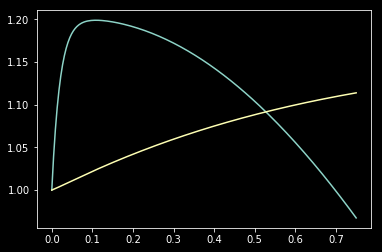

In [217]:
plt.plot(ans2[1],[t[0] for t in ans2[0]])
plt.plot(ans2[1],[t[1] for t in ans2[0]])

In [249]:
u0 = np.matrix([[1.0], [1.0]],dtype = np.float64)
def universal_rosenbrok(f, u0, alpha, t):
    h = 10**-5
    du = np.matrix(np.zeros(u0.shape),dtype = np.float64)
    u =  [u0] * len(t)
    fu = np.zeros((u0.shape[0], u0.shape[0]),dtype = np.float64)
    for i, ui in enumerate(u[ : -1]):
        tau = t[i+1] - t[i]
        for j in range(u0.shape[0]):
            for k in range(u0.shape[0]):
                du = np.matrix( np.zeros(u0.shape),dtype = np.float64)
                du[j] = h
                val = (f(u[i]+du,t[i]) - f(u[i]-du,t[i]))/(2*h)
                fu[j][k] = val[k]
        w = np.linalg.solve( (np.eye(fu.shape[0]) - alpha * tau * fu.T), f(u[i],t[i] + tau/2))
        u[i+1] = u[i] + tau*np.real(w)
    return u, t

In [250]:
ans3 = universal_rosenbrok(f, u0, 1.0/2.0, np.linspace(0,0.75,8))
ans4 = universal_rosenbrok(f, u0, 1.0, np.linspace(0,0.75,16))
ans5 = universal_rosenbrok(f, u0, (1.0+1j)/2.0, np.linspace(0,0.75,8))

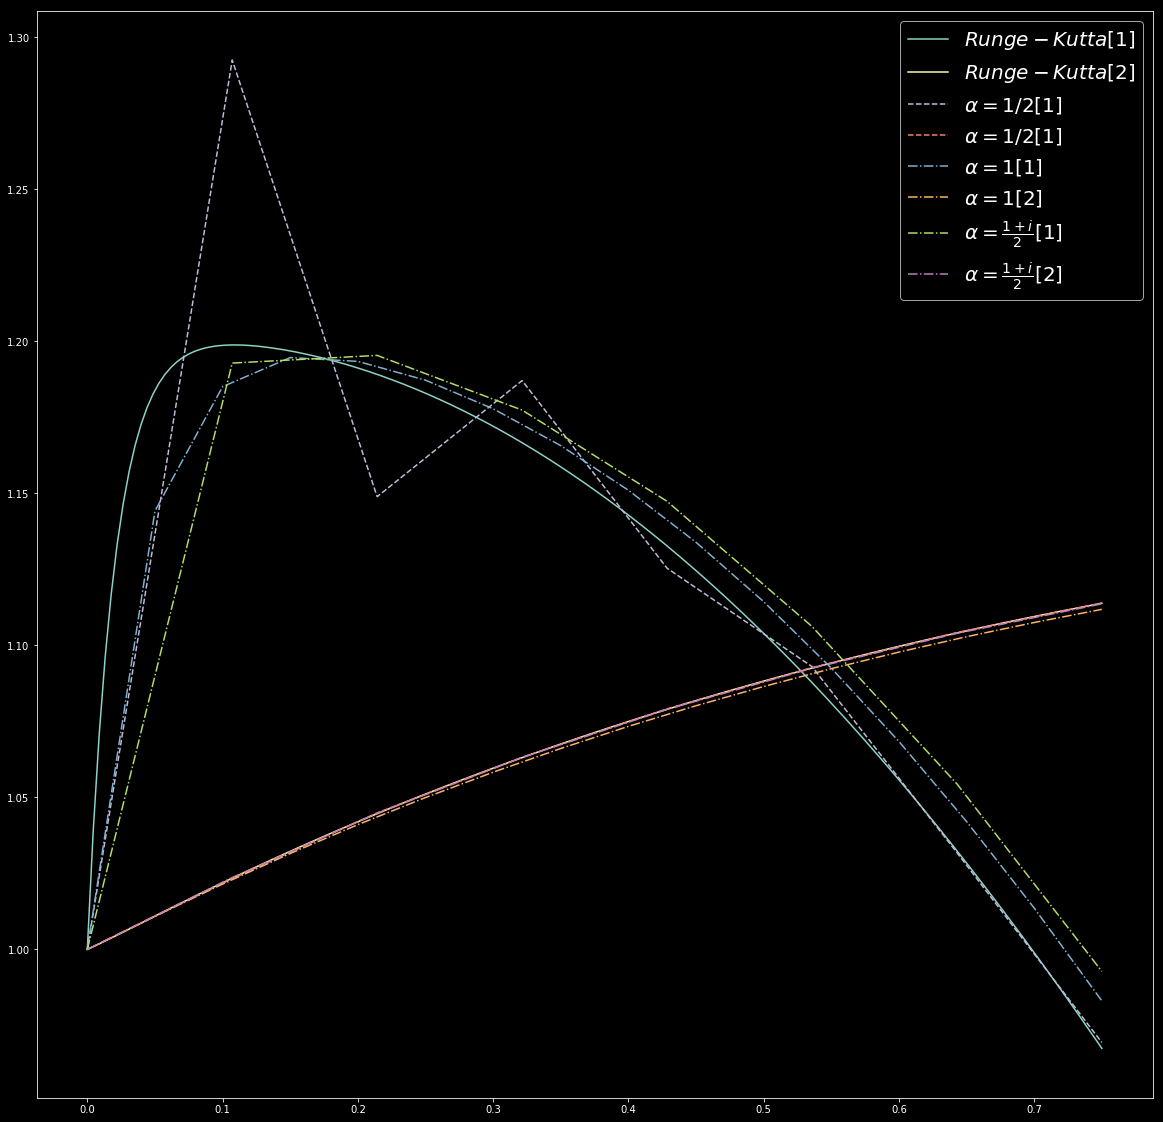

In [251]:
plt.figure(figsize = (20,20))
plt.plot(ans2[1],[t[0] for t in ans2[0]], linestyle = '-')
plt.plot(ans2[1],[t[1] for t in ans2[0]], linestyle = '-')
plt.plot(ans3[1],[t[0].item(0) for t in ans3[0]], linestyle = '--')
plt.plot(ans3[1],[t[1].item(0) for t in ans3[0]], linestyle = '--')
plt.plot(ans4[1],[t[0].item(0) for t in ans4[0]], linestyle = '-.')
plt.plot(ans4[1],[t[1].item(0) for t in ans4[0]], linestyle = '-.')
plt.plot(ans5[1],[t[0].item(0) for t in ans5[0]], linestyle = '-.')
plt.plot(ans5[1],[t[1].item(0) for t in ans5[0]], linestyle = '-.')
plt.legend([r'$Runge-Kutta[1]$', r'$Runge-Kutta[2]$',
    r'$\alpha =1/2 [1]$', r'$\alpha =1/2 [1]$',
            r'$\alpha =1 [1]$', r'$\alpha =1 [2]$',
            r'$\alpha= \frac{1+i}{2} [1]$', r'$\alpha= \frac{1+i}{2} [2]$'], 
           prop={'size': 20})

In [ ]:
plt.figure(figsize = (20,20))
plt.plot(ans2[1],[t[0] for t in ans2[0]], linestyle = '-')
plt.plot(ans2[1],[t[1] for t in ans2[0]], linestyle = '-')
plt.plot(ans3[1],[t[0] for t in ans3[0]], linestyle = '--')
plt.plot(ans3[1],[t[1] for t in ans3[0]], linestyle = '--')
plt.plot(ans4[1],[t[0] for t in ans4[0]], linestyle = '-.')
plt.plot(ans4[1],[t[1] for t in ans4[0]], linestyle = '-.')
plt.plot(ans5[1],[t[0] for t in ans5[0]], linestyle = '-.')
plt.plot(ans5[1],[t[1] for t in ans5[0]], linestyle = '-.')
plt.legend([r'$Runge-Kutta[1]$', r'$Runge-Kutta[2]$',
    r'$\alpha =1/2 [1]$', r'$\alpha =1/2 [1]$',
            r'$\alpha =1 [1]$', r'$\alpha =1 [2]$',
            r'$\alpha= \frac{1+i}{2} [1]$', r'$\alpha= \frac{1+i}{2} [2]$'], 
           prop={'size': 20})